<a href="https://colab.research.google.com/github/Giriteja-08/Image-Detection-Using-Basic-Simple-CNN/blob/main/image_Detection_Classification_Using_Basic_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Soft Computing Project
image detection using simple cnn

Name: C GIRI TEJA

Reg No: 20BCN7153

Importing required libraries

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from keras.datasets import mnist #dataset
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense , Conv2D , MaxPool2D , Flatten
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.optimizers import Adam

Loading the dataset:

Dataset used here is MNIST, it is a collection of around 60000 hand-written digits between 0 to 9 of size 28*28 pixel

In [ ]:
np.random.seed(0)
(X_train, y_train), (X_test, y_test) = mnist.load_data()

11490434/11490434 [==============================] - 1s 0us/step


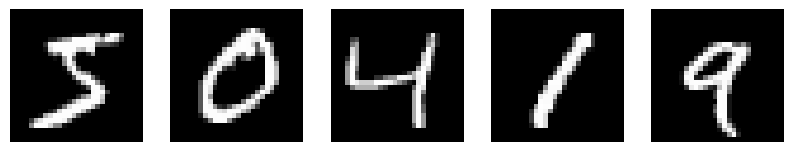

In [ ]:
plt.figure(figsize=(10,10))
for i in range(5):
    plt.subplot(5,5,i+1)
    plt.imshow(X_train[i], cmap='gray')
    plt.axis('off')
plt.show()

In [ ]:
X_train.shape

(60000, 28, 28)

Data Normalization: Here the data between 0-255 will be normalized to the range between 0 to 1.

In [ ]:
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255
tbCallBack = keras.callbacks.TensorBoard(log_dir='./Graph2', histogram_freq=0, write_graph=True, write_images=True)

Defining the model architecture of Basic/Simple CNN.

CNN Architecture:
Input Layer->Convolution Layer->Activation Function->Pooling Layer->Flattening->Fully Connected  Layer->Output Layer.

Conv2D: Convolutional layer with 32 filters of size 3x3, using ReLU activation function.
Input shape: (28, 28, 1) corresponds to 28x28 grayscale images.

MaxPool2D: Max pooling layer with pool size 2x2.
Reduces the spatial dimensions by taking the maximum value within each 2x2 window.

Conv2D: Convolutional layer with 64 filters of size 3x3, using ReLU activation function.

MaxPool2D: Max pooling layer with pool size 2x2.

Flatten(): Flattens the input from 2D to a 1D array.
Necessary before passing the data to a fully connected layer.

Desnse(x,activation='relu'): Fully connected layer with 64 neurons and ReLU activation function. similarly other two are of 32 neurons and 10 neurons with softmax activation function. Softmax outputs probabilities for each class, indicating the model's confidence.

Here Accuracy metric is calculated during training and evaluation.




In [ ]:
model = Sequential(
    [
        Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
        MaxPool2D((2, 2)),
        Conv2D(64, (3, 3), activation='relu'),
        MaxPool2D((2, 2)),
        Flatten(),
        Dense(64, activation='relu'),
        Dense(32, activation='relu'),
        Dense(10, activation='softmax')
    ]
)

# Compiling the model
model.compile(optimizer=Adam(lr=0.04), loss='categorical_crossentropy', metrics=['accuracy'])
# Adam optimizer with learning rate 0.04.
# Categorical cross-entropy loss function is used for multi-class classification.

# Printing the model summary
model.summary()
# Displays a summary of the model architecture, including the number of parameters in each layer,
# as well as the total number of trainable parameters.

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 13, 13, 32)       0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 1600)              0         
                                                                 
 dense_2 (Dense)             (None, 64)               

Training the Model

In [ ]:
from keras.callbacks import TensorBoard
X_train, X_test, y_train, y_test = train_test_split(X_train, y_train, test_size=0.2)
model.fit(X_train.reshape(-1,28,28,1), to_categorical(y_train), epochs=10, validation_split=0.2,callbacks=[TensorBoard('CNN_logs')])

Epoch 1/10
1200/1200 [==============================] - 47s 38ms/step - loss: 0.3124 - accuracy: 0.9278 - val_loss: 0.1065 - val_accuracy: 0.9710
Epoch 2/10
1200/1200 [==============================] - 47s 39ms/step - loss: 0.0797 - accuracy: 0.9765 - val_loss: 0.0736 - val_accuracy: 0.9793
Epoch 3/10
1200/1200 [==============================] - 44s 37ms/step - loss: 0.0576 - accuracy: 0.9829 - val_loss: 0.0782 - val_accuracy: 0.9770
Epoch 4/10
1200/1200 [==============================] - 44s 37ms/step - loss: 0.0477 - accuracy: 0.9849 - val_loss: 0.0723 - val_accuracy: 0.9832
Epoch 5/10
1200/1200 [==============================] - 44s 37ms/step - loss: 0.0432 - accuracy: 0.9871 - val_loss: 0.0658 - val_accuracy: 0.9832
Epoch 6/10
1200/1200 [==============================] - 47s 40ms/step - loss: 0.0339 - accuracy: 0.9894 - val_loss: 0.0675 - val_accuracy: 0.9831
Epoch 7/10
1200/1200 [==============================] - 43s 36ms/step - loss: 0.0316 - accuracy: 0.9901 - val_loss: 0.0595 -

Evaluating the Model

In [ ]:
model.evaluate(X_test.reshape(-1,28,28,1), to_categorical(y_test))

375/375 [==============================] - 4s 10ms/step - loss: 0.0736 - accuracy: 0.9828


[0.07364264875650406, 0.9828333258628845]

Confusin Matrix

In [ ]:
y_pred = model.predict(X_test.reshape(-1,28,28,1))
y_pred = np.argmax(y_pred, axis=1)
y_pred

375/375 [==============================] - 4s 10ms/step


array([3, 6, 6, ..., 5, 1, 6])

In [ ]:
print(confusion_matrix(y_test, y_pred))

[[1198    0    1    0    0    0    2    1    0    3]
 [   1 1362    1    0    2    3    1    5    4    0]
 [   0    0 1158    0    0    0    0    5    2    1]
 [   0    1   11 1175    0   14    0    3    3    1]
 [   1    2    3    0 1103    0    2    7    4   31]
 [   3    0    0    1    0 1060    6    0    3    2]
 [   7    3    1    0    0    6 1169    0    3    1]
 [   0    2    5    2    0    0    0 1217    0    2]
 [   4    3    0    0    0    3    2    1 1172    6]
 [   1    1    0    0    5    3    1   10    4 1180]]


Classification Report


Precision is the ability of a classifier not to label an instance positive that is actually negative.
Prision=TP/(TP+FP)

Recall is the ability of a classifier to find all positive instances.
Recall=TP/(TP+FN)

The F1 score is a weighted harmonic mean of precision and recall such that the best score is 1.0 and the worst is 0.0. Generally speaking, F1 scores are lower than accuracy measures as they embed precision and recall into their computation. As a rule of thumb, the weighted average of F1 should be used to compare classifier models, not global accuracy.
F1-Score=2*(Recall * Precision) / (Recall + Precision)

Support is the number of actual occurrences of the class in the dataset. It doesn’t vary between models, it just diagnoses the performance evaluation process.




In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99      1205
           1       0.99      0.99      0.99      1379
           2       0.98      0.99      0.99      1166
           3       1.00      0.97      0.98      1208
           4       0.99      0.96      0.97      1153
           5       0.97      0.99      0.98      1075
           6       0.99      0.98      0.99      1190
           7       0.97      0.99      0.98      1228
           8       0.98      0.98      0.98      1191
           9       0.96      0.98      0.97      1205

    accuracy                           0.98     12000
   macro avg       0.98      0.98      0.98     12000
weighted avg       0.98      0.98      0.98     12000

